In [1]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

In [2]:
########  Edit After This Line  ############
model = 'Bottom5km-40pct'

# Frequencies for filter
fmin = 1/20. #Hz
fmax = 1/10.  #Hzseis

time_min = -20
time_max = 100
per_norm = False
norm_constant = 5
component = 'BAT'
# Data Directory
dir = '/raid1/zl382/HPC_axisem3d_run/'
plt.rcParams.update({'font.size': 18})

# 1-5s post cursor
[x1,y1] = [93,35]   #  time , azimuth
[x2,y2] = [63,50]
[x3,y3] = [43,65]
timewindow = 20

cut_x = np.linspace(x1,x2, num=10, endpoint=False)    # First Line
cut_y = np.linspace(y1,y2, num=10, endpoint=False)
cut_x = np.append(cut_x,np.linspace(x2,x3, num = 11))
cut_y = np.append(cut_y,np.linspace(y2,y3, num=11))

Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000
Norm value: 0.000000


/raid1/zl382/Libs/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


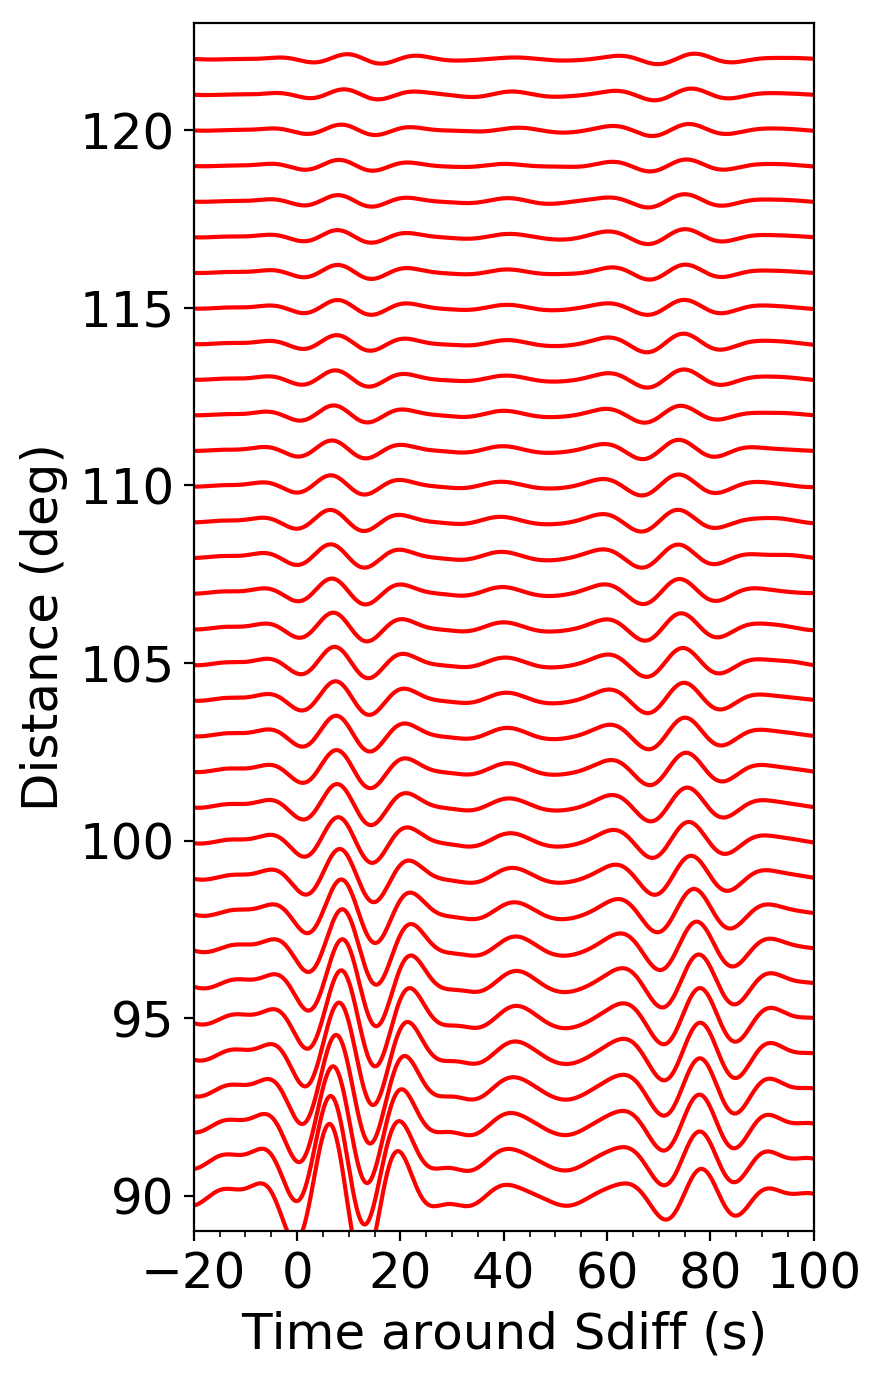

In [3]:
########  Edit Before This Line  ############

plt.figure(dpi=200,figsize=(4,8))

dist_list = np.arange(90,123,1) # [90,95,100,105,110,115,120,125,130,135]

# Loop through seismograms
count = 0
for idist, dist in enumerate(dist_list):
    file = dir + model + '/' + 'post_processing/' + 'UV.D%d.PICKLE' %dist
    seis = read(file,format='PICKLE')
    seistoplot = seis.select(channel=component)[0]
    seistoplot.filter('bandpass', freqmin=fmin,freqmax=fmax, zerophase=True)
    
    # Set the norm value 
    if per_norm:
        norm = np.max(np.abs(seistoplot.data)) / norm_constant
    elif count == 0:
        norm = np.max(np.abs(seistoplot.data)) / norm_constant
    count = count+1
    print('Norm value: %f' % norm)
    # Filter after Norm
#     seistoplot.filter('bandpass', freqmin=fmin,freqmax=fmax, zerophase=True)
    align_time = seis[0].stats.traveltimes['Sdiff'] or seis[0].stats.traveltimes['S']
    plt.plot(seistoplot.ts-align_time,seistoplot.data/norm + dist, c='r')

plt.xlim(time_min, time_max)
plt.ylim(dist_list.min()-1,dist_list.max()+1)
# plt.suptitle('%s' % model)
# plt.title('freq: %d - %d s' %(1/fmax, 1/fmin), fontsize=10)
plt.ylabel('Distance (deg)')
plt.xlabel('Time around Sdiff (s)')
ax = plt.subplot(1,1,1)
ax.xaxis.set_major_locator(plt.MultipleLocator(20))   
ax.xaxis.set_minor_locator(plt.MultipleLocator(5)) 

plt.show()